In [ ]:
#ASSIGNMENT 2, CULTURAL DATA SCIENCE 2024

In [ ]:
#Part 1 - margarine and divorce

In [7]:
#installing
install.packages('dslabs')
install.packages('ggplot2')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [4]:
#loading libraries
library(dslabs)
library(dplyr)
library(ggplot2)

In [ ]:
#loading the data

In [5]:
data(divorce_margarine)

In [9]:
head(divorce_margarine)

,divorce_rate_maine,margarine_consumption_per_capita,year
,<dbl>,<dbl>,<int>
1,5.0,8.2,2000
2,4.7,7.0,2001
3,4.6,6.5,2002
4,4.4,5.3,2003
5,4.3,5.2,2004
6,4.1,4.0,2005


In [12]:
divorce_margarine

divorce_rate_maine,margarine_consumption_per_capita,year
<dbl>,<dbl>,<int>
5.0,8.2,2000
4.7,7.0,2001
4.6,6.5,2002
4.4,5.3,2003
4.3,5.2,2004
4.1,4.0,2005
4.2,4.6,2006
4.2,4.5,2007
4.2,4.2,2008


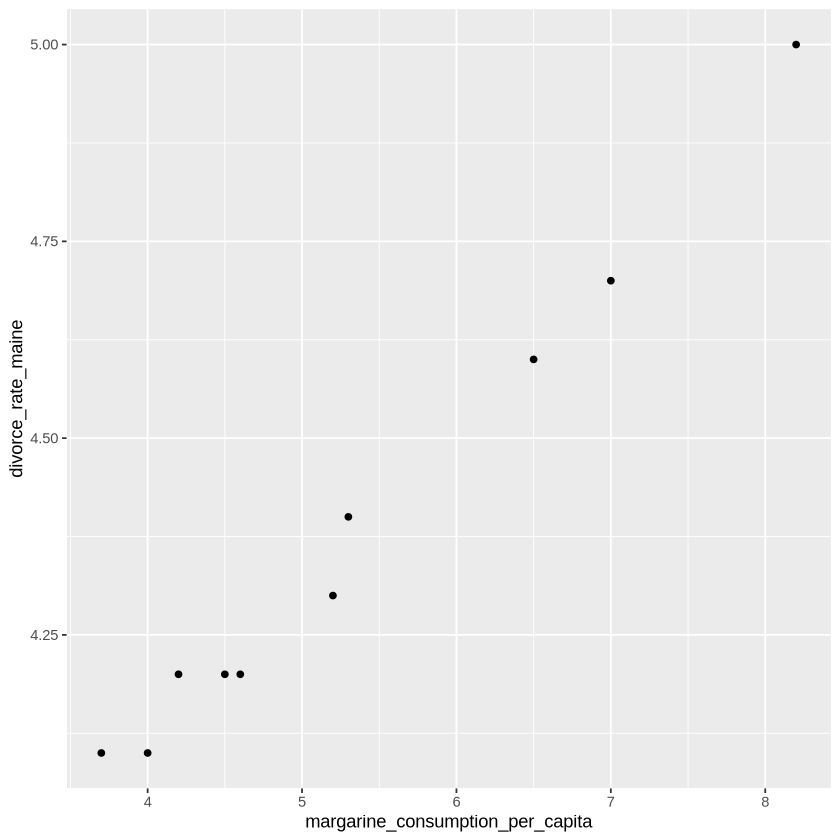

In [11]:
ggplot(divorce_margarine,
       aes(x = margarine_consumption_per_capita,
           y = divorce_rate_maine)) +
    geom_point()

In [ ]:
#Conclusion: It seems that those who consume more margarine also have higher rates

In [ ]:
#However, they are both get lower over time, so we cannot say much. It is likely not closely related, though perhaps tied to common economic reasons

In [13]:
cor.test(divorce_margarine$divorce_rate_maine, divorce_margarine$margarine_consumption_per_capita)


	Pearson's product-moment correlation

data:  divorce_margarine$divorce_rate_maine and divorce_margarine$margarine_consumption_per_capita
t = 23.055, df = 8, p-value = 1.33e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9676666 0.9983038
sample estimates:
      cor 
0.9925585 


In [ ]:
#the confidence is quite high

# Part 2 

In [20]:
install.packages('car')

Installing package into ‘/usr/local/spark-3.5.2-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [21]:
library(car)

In [ ]:
data(GSSvocab)

In [24]:
head(GSSvocab)

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12


In [25]:
Vocab1978 <- GSSvocab %>%
    filter(year == "1978")
str(Vocab1978)

'data.frame':	1532 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


In [26]:
Vocab1978

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12
1978.7,1978,male,yes,18-29,12 yrs,4,19,12
1978.8,1978,male,yes,50-59,12 yrs,7,59,12
1978.9,1978,female,yes,40-49,16 yrs,8,49,16


In [31]:
Vocab78Sorted <- Vocab1978 %>%
    na.exclude(Vocab1978)
str(Vocab78Sorted)

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


In [ ]:
#Alternatively: This way only excludes NA in one column

In [ ]:
Vocab78Sorted <- Vocab1978 %>%
    na.exclude(vocab = "NA")
str(Vocab78Sorted)

In [29]:
head(Vocab78Sorted)

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12


In [32]:
Vocab78Sorted

,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12
1978.7,1978,male,yes,18-29,12 yrs,4,19,12
1978.8,1978,male,yes,50-59,12 yrs,7,59,12
1978.9,1978,female,yes,40-49,16 yrs,8,49,16


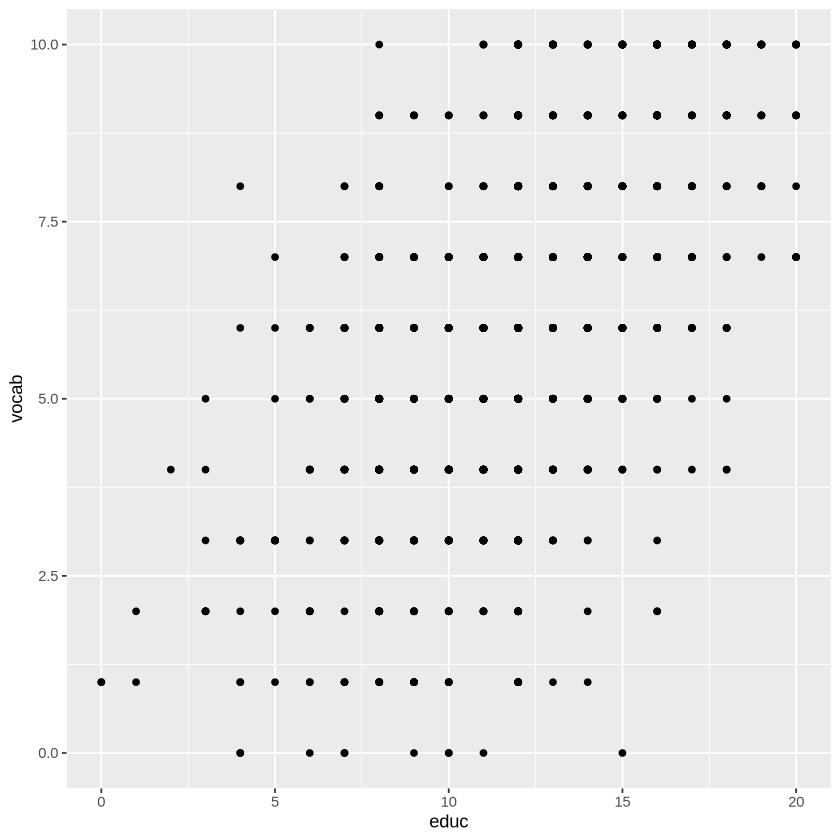

In [34]:
ggplot(Vocab78Sorted,
       aes(x = educ,
           y = vocab)) +
    geom_point()

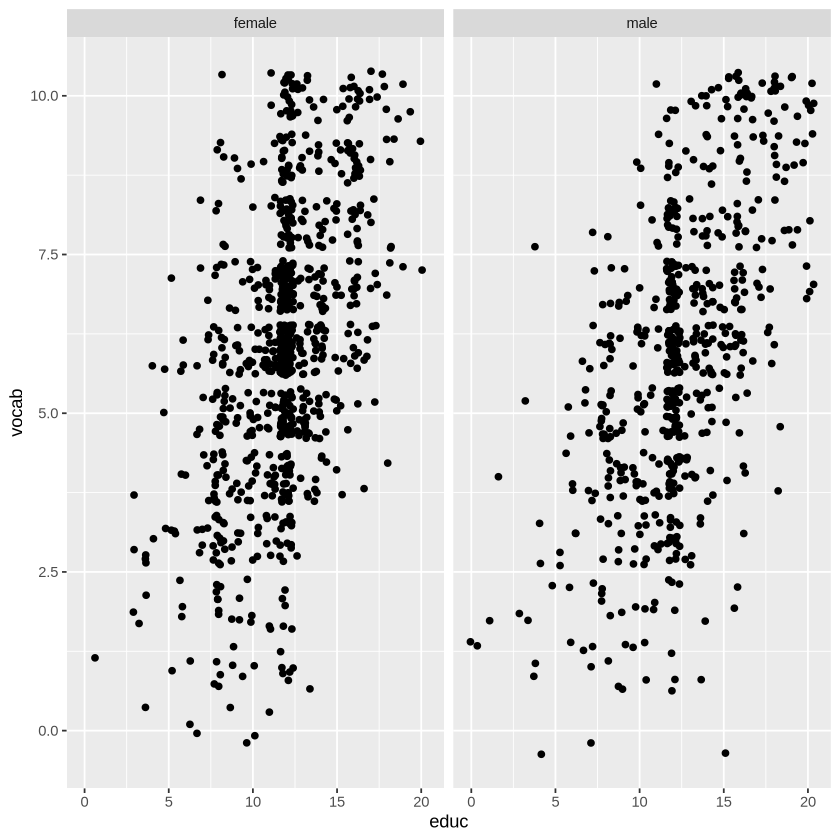

In [37]:
ggplot(Vocab78Sorted,
       aes(x = educ,
           y = vocab)) +
    geom_point(position = 'jitter') +
    facet_wrap( ~gender)

In [ ]:
# As we can see, education and vocabulary are tied together

In [40]:
vocab_model <- lm(vocab ~ educ, Vocab78Sorted)
summary(vocab_model)


Call:
lm(formula = vocab ~ educ, data = Vocab78Sorted)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


In [42]:
summary(lm(educ ~ vocab, data = Vocab78Sorted))


Call:
lm(formula = educ ~ vocab, data = Vocab78Sorted)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5420 -1.5420 -0.0731  1.6614  7.3959 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.66623    0.19136   40.06   <2e-16 ***
vocab        0.73447    0.03005   24.44   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.579 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


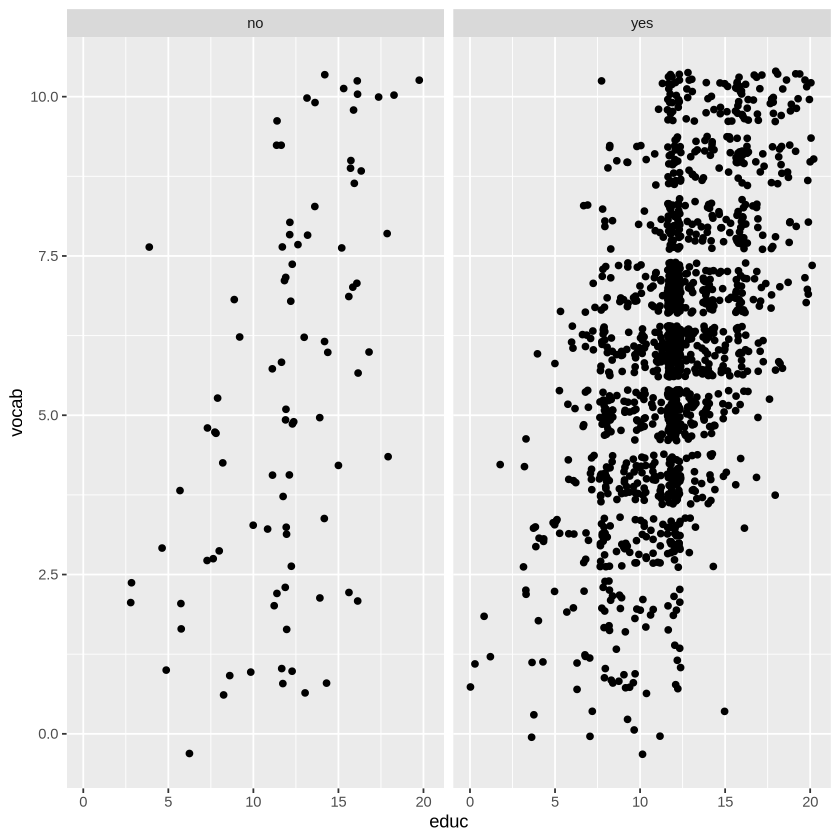

In [44]:
ggplot(Vocab78Sorted,
       aes(x = educ,
           y = vocab)) +
    geom_point(position = 'jitter') +
    facet_wrap( ~nativeBorn)

In [46]:
summary(lm(vocab ~ educ * nativeBorn, Vocab78Sorted))


Call:
lm(formula = vocab ~ educ * nativeBorn, data = Vocab78Sorted)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1554 -1.2049  0.0149  1.2347  5.9857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.35394    0.68780   0.515    0.607    
educ                0.41510    0.05496   7.553 7.45e-14 ***
nativeBornyes       0.95000    0.71855   1.322    0.186    
educ:nativeBornyes -0.02501    0.05745  -0.435    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.88 on 1473 degrees of freedom
Multiple R-squared:  0.2932,	Adjusted R-squared:  0.2917 
F-statistic: 203.7 on 3 and 1473 DF,  p-value: < 2.2e-16


In [ ]:
#There is a strong correlation between education and vocab. Dividing native born and non native born, makes sense as a control/investigation, but it does not change results. With both groups, educ and vocab are related in roughly the same way.

In [ ]:
#All models perform nearly the same